## The retirement gap

### Disclaimer: the interpretation of retirement in years is probably wrong. 

Data scource: OECD (Organisation for economic co-operation and development)
https://stats.oecd.org/index.aspx?queryid=54758



Hypothesis: The time it takes to retire is directly proportional to earnings. Thanks to pay gap, there must exist a retirement gap.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "data/OECD/all_countries_retirement_data.csv"
data = pd.read_csv(url)
data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,19.6,NaN,NaN
1,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,19.5,NaN,NaN
2,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,24.1,NaN,NaN
3,AUS,Australia,EMP16,"Expected number of years in retirement, by sex",WOMEN,Women,TOTAL,Total,2012,2012,YR,Years,0,Units,NaN,NaN,24.2,NaN,NaN
4,AUT,Austria,EMP16,"Expected number of years in retirement, by sex",MEN,Men,TOTAL,Total,2010,2010,YR,Years,0,Units,NaN,NaN,21.9,NaN,NaN


In [4]:
data.shape

(2424, 19)

In [5]:
data = data[["COU","Country","Sex","Time","Value"]]
data.head()

,COU,Country,Sex,Time,Value
0,AUS,Australia,Men,2010,19.6
1,AUS,Australia,Men,2012,19.5
2,AUS,Australia,Women,2010,24.1
3,AUS,Australia,Women,2012,24.2
4,AUT,Austria,Men,2010,21.9


In [6]:
uk_data = data.loc[data['COU'] == 'GBR']
uk_data.head()

,COU,Country,Sex,Time,Value
112,GBR,United Kingdom,Men,2010,18.9
113,GBR,United Kingdom,Men,2012,19.3
114,GBR,United Kingdom,Women,2010,23.4
115,GBR,United Kingdom,Women,2012,23.1
168,GBR,United Kingdom,Women,2014,23.1


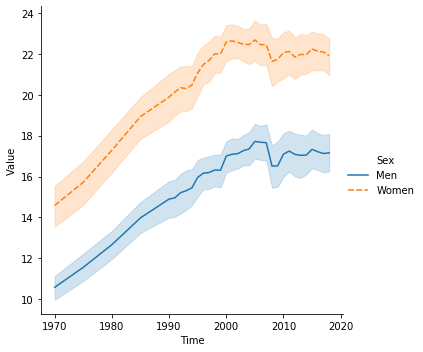

In [7]:
#sns.set(style="whitegrid")
sns.relplot(x="Time", y="Value",
            hue="Sex", style="Sex",
            kind="line", data=data);
# sns.relplot(x="Time", y="Value", hue="Sex",
#           data=uk_data);

Get year values for (women - men) for uk_data

In [8]:
new_uk_data = pd.pivot_table(uk_data, index=['Time'],
                        columns=['Sex'],values=['Value'])
new_data = pd.pivot_table(data, index=['Time'],
                        columns=['Sex'],values=['Value'])
#aggfunc='mean'

In [9]:
new_uk_data.columns =[s2 for (s1,s2) in new_uk_data.columns.tolist()]
new_data.columns =[s2 for (s1,s2) in new_data.columns.tolist()]

new_data.head()

,Men,Women
Time,,
1970,10.578571,14.582143
1975,11.558621,15.720690
1980,12.666667,17.286667
1985,13.976667,18.930000
1990,14.896774,19.887097


In [10]:
new_uk_data['Gap'] = new_uk_data['Women'] - new_uk_data['Men']
new_uk_data.head()
new_data['Gap'] = new_data['Women'] - new_data['Men']
new_data.head()

,Men,Women,Gap
Time,,,
1970,10.578571,14.582143,4.003571
1975,11.558621,15.720690,4.162069
1980,12.666667,17.286667,4.620000
1985,13.976667,18.930000,4.953333
1990,14.896774,19.887097,4.990323


In [11]:
new_data.shape
new_data['Retirement_gap'] = (new_data['Gap'] / new_data['Men']) * 100 #convert to percentage
new_uk_data['Retirement_gap_uk'] = (new_uk_data['Gap'] / new_uk_data['Men']) * 100

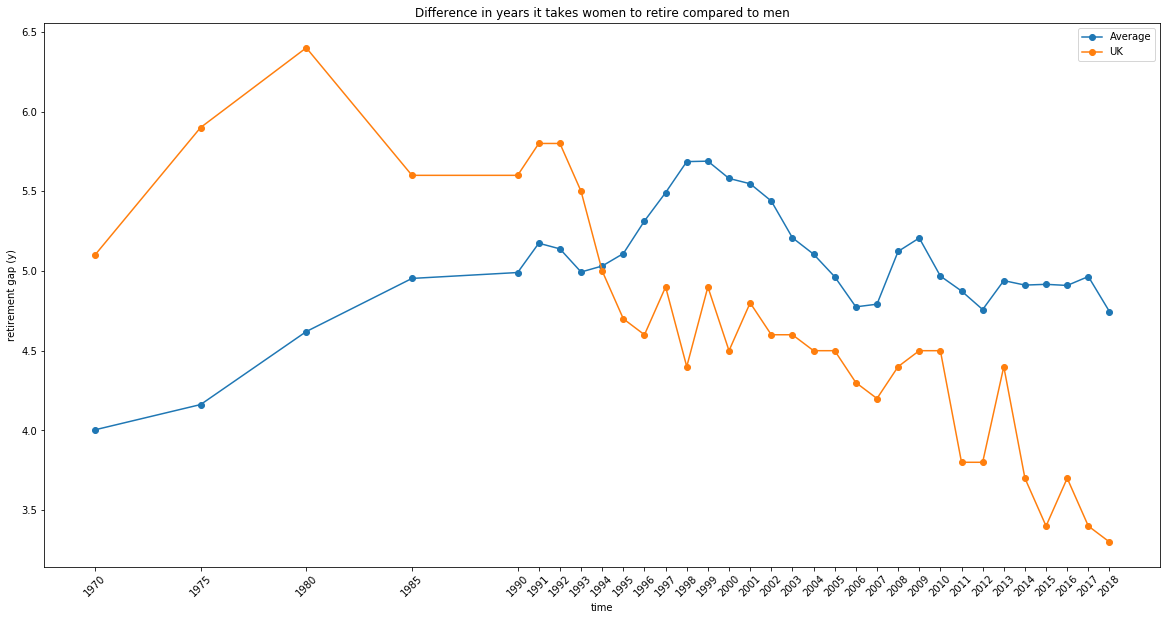

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(new_data.index,new_data['Gap'],label='Average', marker='o')
ax.plot(new_uk_data.index,new_uk_data['Gap'], label='UK', marker='o')
ax.legend()
ax.set(xlabel='time', ylabel='retirement gap (y)',
       title='Difference in years it takes women to retire compared to men')
plt.xticks(new_data.index, rotation='45')

plt.show()

Decreased but was never zero or negative :(

## Merging with gender pay gap data

Source https://stats.oecd.org/index.aspx?queryid=54751

In [36]:
url2 = "data/OECD/all_countries_pay_gap.csv"
pg_data = pd.read_csv(url2)
pg_data.head()

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2000,2000,PC,Percentage,0,Units,NaN,NaN,17.2,NaN,NaN
1,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2001,2001,PC,Percentage,0,Units,NaN,NaN,14.3,NaN,NaN
2,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2002,2002,PC,Percentage,0,Units,NaN,NaN,15.0,NaN,NaN
3,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2003,2003,PC,Percentage,0,Units,NaN,NaN,13.0,NaN,NaN
4,AUS,Australia,EMP9,Gender wage gap,ALL_PERSONS,All persons,TOTAL,Total,2004,2004,PC,Percentage,0,Units,NaN,NaN,14.4,NaN,NaN


In [37]:
oecdValues = pg_data.Value.describe()
oecdValues

count    527.000000
mean      15.335674
std        7.652646
min        0.000000
25%        9.950000
50%       15.000000
75%       19.200000
max       41.700000
Name: Value, dtype: float64

In [38]:
pg_uk_data = pg_data.loc[pg_data['COU'] == 'GBR']
pg_data = pg_data[["Time","Value"]]
pg_uk_data = pg_uk_data[["Time","Value"]]
#pg_data.replace({'Time': 'Latest year'}, 2020, inplace=True)
pg_data.set_index('Time', inplace=True)
pg_uk_data.set_index('Time',inplace=True)

In [39]:
pg_uk_data.rename(index={'Latest year':'2020'}, inplace=True)
pg_uk_data.rename(columns={ 'Value': 'Pay_gap_uk'}, inplace=True)
pg_data = pg_data.groupby(level=0).mean()
pg_data.shape

(19, 1)

In [42]:
oecdValues_uk = pg_uk_data.Pay_gap_uk.describe()
oecdValues_uk

count    19.000000
mean     20.457895
std       3.285882
min      16.400000
25%      17.450000
50%      20.700000
75%      22.750000
max      26.300000
Name: Pay_gap_uk, dtype: float64

In [25]:
pg_uk_data.index = pg_data.index.astype(str).astype(int)
pg_uk_data.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Time')

###  Merge with retirement data

In [26]:
mergedDf = pd.merge(new_data,pg_data, left_index=True, right_index=True, how='outer')
mergedDf = pd.merge(new_uk_data,mergedDf, left_index=True, right_index=True, how='outer')
mergedDf = pd.merge(pg_uk_data,mergedDf, left_index=True, right_index=True, how='outer')
#mergedDf

In [27]:
mergedDf.rename(columns={ 'Value': 'Pay_gap'}, inplace=True)

In [28]:
#mergedDf = mergedDf[['Retirement_gap','Pay_gap']]

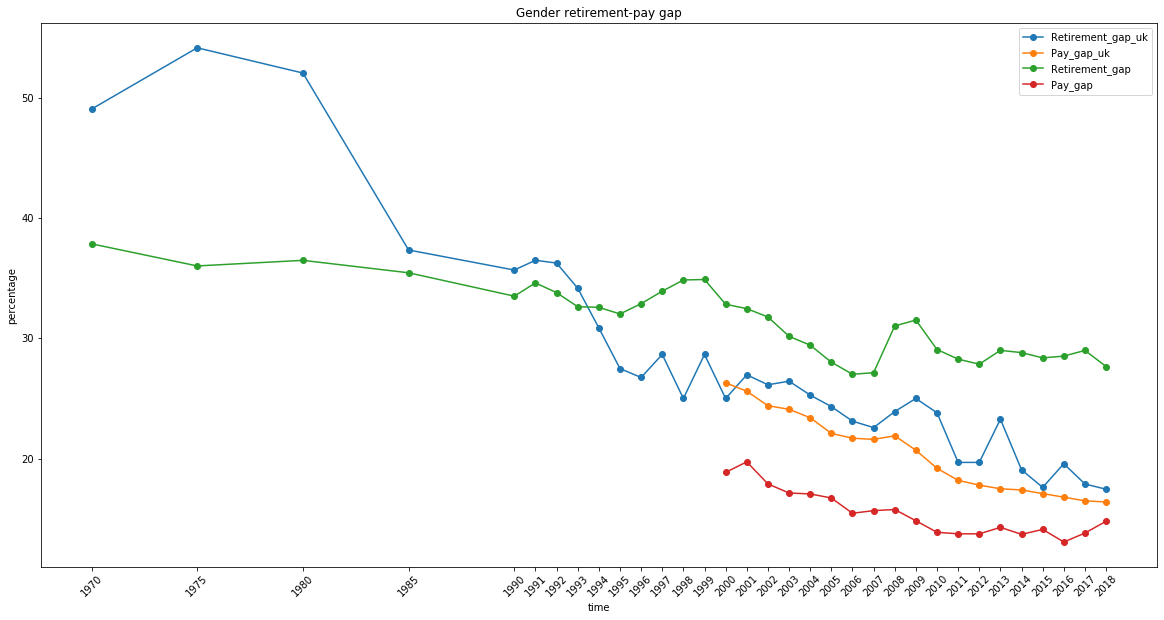

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(mergedDf.index,mergedDf.Retirement_gap_uk,linestyle='-', marker='o',label='Retirement_gap_uk')
ax.plot(mergedDf.index,mergedDf.Pay_gap_uk,linestyle='-', marker='o',label='Pay_gap_uk')
ax.plot(mergedDf.index,mergedDf.Retirement_gap, linestyle='-', marker='o',label='Retirement_gap')
ax.plot(mergedDf.index,mergedDf.Pay_gap,linestyle='-', marker='o',label='Pay_gap')

ax.legend()
ax.set(xlabel='time', ylabel='percentage',
       title='Gender retirement-pay gap')
plt.xticks(new_uk_data.index, rotation='45')

plt.show()

We can see a decreasing trend but it's not zero. A positive correlation between retirement gap and pay gap.

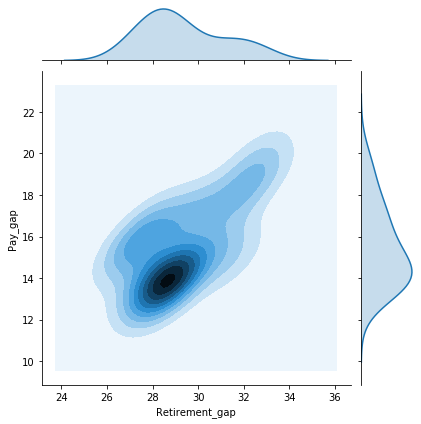

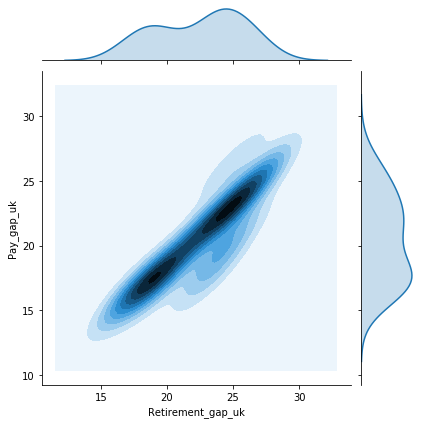

In [30]:
ax1 = sns.jointplot(x=mergedDf.Retirement_gap,y=mergedDf.Pay_gap,kind='kde')
ax2 = sns.jointplot(x=mergedDf.Retirement_gap_uk,y=mergedDf.Pay_gap_uk,kind='kde')

Extras:
Entrepreneurship  : Gender gap in self-employed earnings https://stats.oecd.org/index.aspx?queryid=54681

## Visualization trials

In [4]:
url = 'data/gender-pay-gap-uk-gov/2018.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [5]:
data.shape

(10817, 25)

In [6]:
data.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

In [7]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,9068.000000,9068.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,-1.033855,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,219.025483,295.383196,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.050000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


From count we see the DiffMeanBonusPercent and DiffMedianBonusPercent have missing values
The max and min values are also crazy.

In [15]:
# clean up - dropping all with values bigger than 100

# data = data[(data.DiffMeanHourlyPercent>-100) & 
#      (data.DiffMeanHourlyPercent<100) &
#      (data.DiffMedianHourlyPercent>-100) &
#      (data.DiffMedianHourlyPercent<100)]
data = data[(data.DiffMeanBonusPercent>-100) & 
     (data.DiffMeanBonusPercent<100) &
     (data.DiffMedianBonusPercent>-100) &
     (data.DiffMedianBonusPercent<100)]

In [53]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000
mean,15.389972,12.241516,30.675345,20.775513,43.953393,42.504455,48.196734,51.803266,52.528738,47.471262,57.030359,42.969641,63.331380,36.668620
std,13.975247,14.998025,33.778702,32.482107,36.305775,36.227367,23.042605,23.042605,25.202423,25.202423,25.421977,25.421977,23.186243,23.186243
min,-98.700000,-92.300000,-99.600000,-99.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.500000,3.500000,0.000000,7.050000,5.600000,30.250000,34.200000,33.000000,26.400000,37.800000,20.300000,46.300000,16.300000
50%,14.300000,10.200000,33.100000,17.200000,38.200000,35.900000,47.000000,53.000000,51.700000,48.300000,57.000000,43.000000,66.400000,33.600000
75%,23.500000,21.200000,56.000000,43.000000,82.000000,80.350000,65.800000,69.750000,73.600000,67.000000,79.700000,62.200000,83.700000,53.700000
max,91.700000,79.300000,99.700000,99.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [18]:
# ukGovMean = data.DiffMeanHourlyPercent.describe()
# print(ukGovMean)
# ukGovMedian = data.DiffMedianHourlyPercent.describe()
# print(ukGovMedian)
# print(pg_uk_data[pg_uk_data.index == 2018])
# print(oecdValues)
# print(oecdValues_uk)

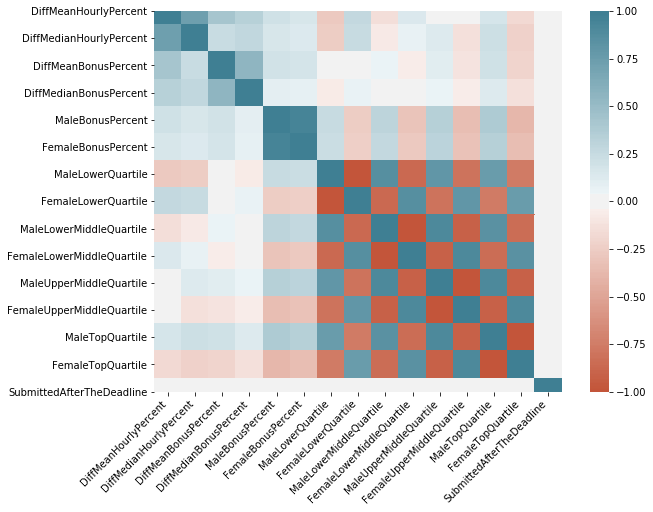

In [19]:
corr = data.corr()
fig = plt.figure(figsize=(10,7))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
salary_diff_cols = ['DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent','DiffMedianBonusPercent']
bonus_cols = ['MaleBonusPercent','FemaleBonusPercent']

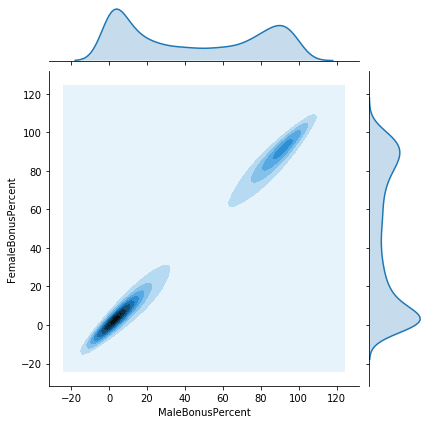

In [21]:
bonus_data = data[bonus_cols]
# sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='scatter')
# sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='hex')
sns.jointplot(x=bonus_data.MaleBonusPercent, y=bonus_data.FemaleBonusPercent, kind='kde')

Men and women seem to be getting same bonuses

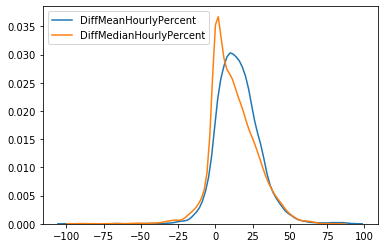

In [22]:
salary_diff_data = data[salary_diff_cols]
sns.kdeplot(salary_diff_data.DiffMeanHourlyPercent)
sns.kdeplot(salary_diff_data.DiffMedianHourlyPercent)

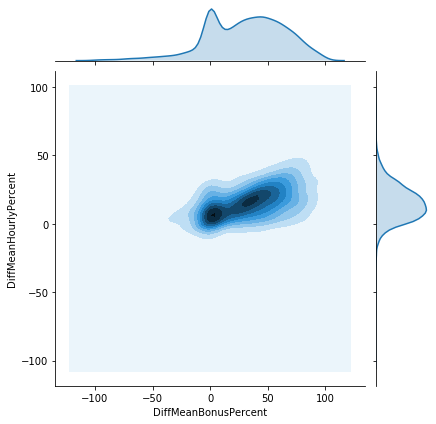

In [24]:
sns.jointplot(x=salary_diff_data.DiffMeanBonusPercent,y=salary_diff_data.DiffMeanHourlyPercent,kind='kde')

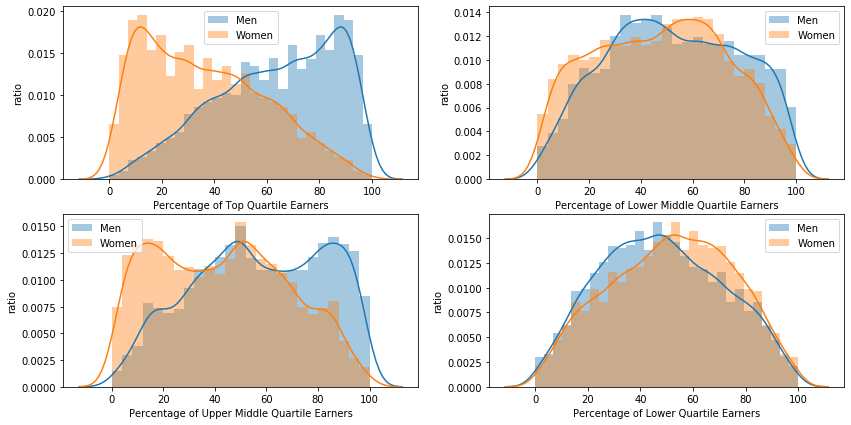

In [25]:
f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=False)
ax1 = sns.distplot(data.MaleTopQuartile, label='Men', ax=axes[0,0])
ax1 = sns.distplot(data.FemaleTopQuartile, label='Women', ax=axes[0,0])
ax1.set(xlabel='Percentage of Top Quartile Earners', ylabel='ratio')
ax1.legend()

ax2 = sns.distplot(data.MaleLowerMiddleQuartile, label='Men', ax=axes[0,1])
ax2 = sns.distplot(data.FemaleLowerMiddleQuartile, label='Women', ax=axes[0,1])
ax2.set(xlabel='Percentage of Lower Middle Quartile Earners', ylabel='ratio')
ax2.legend()

ax3 = sns.distplot(data.MaleUpperMiddleQuartile, label='Men', ax=axes[1,0])
ax3 = sns.distplot(data.FemaleUpperMiddleQuartile, label='Women', ax=axes[1,0])
ax3.set(xlabel='Percentage of Upper Middle Quartile Earners', ylabel='ratio')
ax3.legend()

ax4 = sns.distplot(data.MaleLowerQuartile, label='Men', ax=axes[1,1])
ax4 = sns.distplot(data.FemaleLowerQuartile, label='Women', ax=axes[1,1])
ax4.set(xlabel='Percentage of Lower Quartile Earners', ylabel='ratio')
ax4.legend()

In [41]:
siccodeUrl = "data/siccodes/SIC07_CH_condensed_list_en.csv"
siccode = pd.read_csv(siccodeUrl)
siccode.head()

,SIC Code,Description
0,1110,"Growing of cereals (except rice), leguminous c..."
1,1120,Growing of rice
2,1130,"Growing of vegetables and melons, roots and tu..."
3,1140,Growing of sugar cane
4,1150,Growing of tobacco


In [42]:
url1 = "data/siccodes/uk-sic-2007-condensed_csv.csv"
sic = pd.read_csv(url1)
sic.head()

,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous c...",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007
2,1130,"Growing of vegetables and melons, roots and tu...",A,"Agriculture, Forestry and Fishing",SIC 2007
3,1140,Growing of sugar cane,A,"Agriculture, Forestry and Fishing",SIC 2007
4,1150,Growing of tobacco,A,"Agriculture, Forestry and Fishing",SIC 2007


In [43]:
#picked up on the internet
def sic_desc(df):
    
    df = df[~df.SicCodes.isna()]
    
    df['SicCodes'] = df.apply(lambda row: row.SicCodes.replace('\n','')\
                                                      .replace('\r','')\
                                                      .split(','), axis=1)
    df = df.explode('SicCodes')
    df['SicCodes'] = pd.to_numeric(df.SicCodes)
    
    return df.merge(sic, how='left', left_on='SicCodes', 
                    right_on='sic_code')

In [104]:
modified_data = sic_desc(data)
modified_data.describe()

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,sic_code
count,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,11695.000000,10615.000000
mean,55752.519795,15.544412,12.749047,30.049491,20.487371,41.320428,39.590073,47.315579,52.684421,51.598854,48.401146,56.155733,43.844267,62.343976,37.656024,61424.836458
std,28259.634756,13.632788,15.033128,33.694184,32.503765,36.430864,36.125976,23.541494,23.541494,25.614733,25.614733,26.023704,26.023704,23.894667,23.894667,23052.523852
min,1.000000,-98.700000,-92.300000,-99.600000,-99.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1110.000000
25%,41202.000000,6.500000,2.000000,0.600000,0.000000,5.400000,3.600000,28.800000,34.400000,31.100000,26.700000,35.300000,20.000000,43.000000,16.000000,46140.000000
50%,59111.000000,14.700000,10.900000,32.100000,16.600000,31.200000,29.500000,46.400000,53.600000,50.000000,50.000000,55.500000,44.500000,65.000000,35.000000,64192.000000
75%,82990.000000,23.700000,21.700000,55.400000,42.700000,79.800000,77.400000,65.600000,71.200000,73.300000,68.900000,80.000000,64.700000,84.000000,57.000000,82990.000000
max,99999.000000,91.700000,79.300000,99.700000,99.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99999.000000


In [105]:
modified_data.section_description.unique

<bound method Series.unique of 0        Wholesale and retail trade; repair of motor ve...
1                            Information and communication
2            Administrative and support service activities
3                                                Education
4                                                Education
                               ...                        
11690        Administrative and support service activities
11691        Administrative and support service activities
11692        Administrative and support service activities
11693    Professional, scientific and technical activities
11694                                        Manufacturing
Name: section_description, Length: 11695, dtype: object>

In [106]:
sad_data = modified_data[(modified_data.DiffMeanHourlyPercent>40)]
sad_data.groupby('section_description').count()['section'].sort_values(ascending=False).head(20)

section_description
Financial and insurance activities                          71
Arts, entertainment and recreation                          62
Professional, scientific and technical activities           57
Wholesale and retail trade; repair of motor vehicles and    48
Construction                                                47
Administrative and support service activities               36
Human health and social work activities                     22
Information and communication                               22
Transportation and storage                                  21
Manufacturing                                               15
Real estate activities                                      15
Education                                                   12
Accommodation and food service activities                    7
Water supply, sewerage, waste management and                 4
Mining and Quarrying                                         4
Other service activities           

In [107]:
sad_data.groupby('sic_description').count()['section'].sort_values(ascending=False).head(20)

sic_description
Activities of head offices                                      43
Other business support service activities n.e.c. security       27
Activities of sport clubs                                       27
Operation of sports facilities                                  18
Financial intermediation not elsewhere classified               14
Retail sale of clothing in specialised stores                   13
Construction of commercial buildings                            13
Non-life insurance                                              12
Other sports activities                                         11
Scheduled passenger air transport                                9
Banks                                                            8
Electrical installation                                          8
Other information technology service activities                  7
Activities of financial services holding companies               7
Retail sale of footwear in specialised stores 

## Gonna try some Machine Learning

In [108]:
modified_data = modified_data.dropna(axis=0) #droping missing values everywhere

In [109]:
modified_data.columns

Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted', 'sic_code',
       'sic_description', 'section', 'section_description', 'sic_version'],
      dtype='object')

In [110]:
y = modified_data.DiffMeanHourlyPercent

In [111]:
features = ['DiffMeanBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize']

In [112]:
X = modified_data[features]

In [113]:
X.describe()

,DiffMeanBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,6585.000000,6585.000000,6585.000000,6585.000000,6585.000000,6585.000000,6585.000000,6585.000000,6585.000000
mean,35.036856,51.333333,48.666667,56.716659,43.283341,61.803569,38.196431,68.010418,31.989582
std,33.032429,22.453453,22.453453,24.646281,24.646281,24.963577,24.963577,22.838363,22.838363
min,-99.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.700000,35.000000,31.000000,38.000000,22.800000,44.000000,17.000000,53.400000,13.000000
50%,39.100000,51.000000,49.000000,58.800000,41.200000,65.300000,34.700000,73.200000,26.800000
75%,59.000000,69.000000,65.000000,77.200000,62.000000,83.000000,56.000000,87.000000,46.600000
max,99.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [114]:
X.dtypes

DiffMeanBonusPercent         float64
MaleLowerQuartile            float64
FemaleLowerQuartile          float64
MaleLowerMiddleQuartile      float64
FemaleLowerMiddleQuartile    float64
MaleUpperMiddleQuartile      float64
FemaleUpperMiddleQuartile    float64
MaleTopQuartile              float64
FemaleTopQuartile            float64
EmployerSize                  object
dtype: object

In [115]:
X['EmployerSize'] = X['EmployerSize'].astype('category')
X.dtypes

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


DiffMeanBonusPercent          float64
MaleLowerQuartile             float64
FemaleLowerQuartile           float64
MaleLowerMiddleQuartile       float64
FemaleLowerMiddleQuartile     float64
MaleUpperMiddleQuartile       float64
FemaleUpperMiddleQuartile     float64
MaleTopQuartile               float64
FemaleTopQuartile             float64
EmployerSize                 category
dtype: object

In [116]:
X['EmployerSize'] = X['EmployerSize'].cat.codes
X.head()

/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DiffMeanBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize
3,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,2
4,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,2
5,-69.0,49.0,51.0,63.0,37.0,32.0,68.0,23.0,77.0,2
6,61.4,46.3,53.7,43.2,56.8,31.1,68.9,40.0,60.0,3
7,61.4,46.3,53.7,43.2,56.8,31.1,68.9,40.0,60.0,3


In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [118]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

5.150151791135397


In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
new_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, new_preds))

4.284735276259867


In [121]:
feature_importances = pd.DataFrame(forest_model.feature_importances_,
index = train_X.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
DiffMeanBonusPercent,0.294456
MaleLowerQuartile,0.140875
FemaleLowerQuartile,0.137844
MaleTopQuartile,0.132323
FemaleTopQuartile,0.120033
FemaleLowerMiddleQuartile,0.044321
MaleLowerMiddleQuartile,0.041761
MaleUpperMiddleQuartile,0.036788
FemaleUpperMiddleQuartile,0.035760
EmployerSize,0.015838


Best differenciator is bonus. Lower and top quartiles matter, too.

Employer size doesn't matter as much 